# Apply UMAP

In [1]:
import os
import pandas as pd
import sklearn
import umap

import plotnine as gg

In [2]:
def get_umap_viz(file):
    train_df = pd.read_csv(file)

    eb_features = [x for x in train_df.columns if x.startswith(("actin", "DNA"))]
    meta_features = train_df.drop(eb_features, axis='columns').columns.tolist()
    
    meta_df = train_df.drop(eb_features, axis="columns")
    umap_data_df = train_df.loc[:, eb_features]
    
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = pd.concat([embedding_df, meta_df], axis="columns")
    
    p = gg.ggplot(embedding_df,
              gg.aes('x', 'y',
                     color='target')) + \
        gg.geom_point(size = 0.1) + \
        gg.theme_bw() + \
        gg.xlab("x") + \
        gg.ylab("y") 
    
    return embedding_df, p

In [3]:
file = os.path.join("data", "training_feature_select_robust.csv")
embedding_normalize_df, normalize_plot = get_umap_viz(file)

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py:439: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py (446)

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py", line 446:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<fu

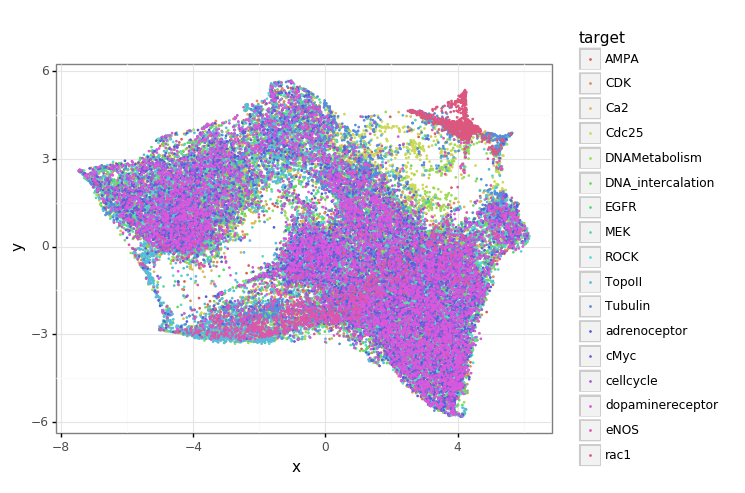

<ggplot: (-9223372036550121398)>

In [4]:
normalize_plot

In [43]:
file = os.path.join("data", "training_logged_centered.csv")
log_center_embedding_df, log_center_plot = get_umap_viz(file)
log_center_plot

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


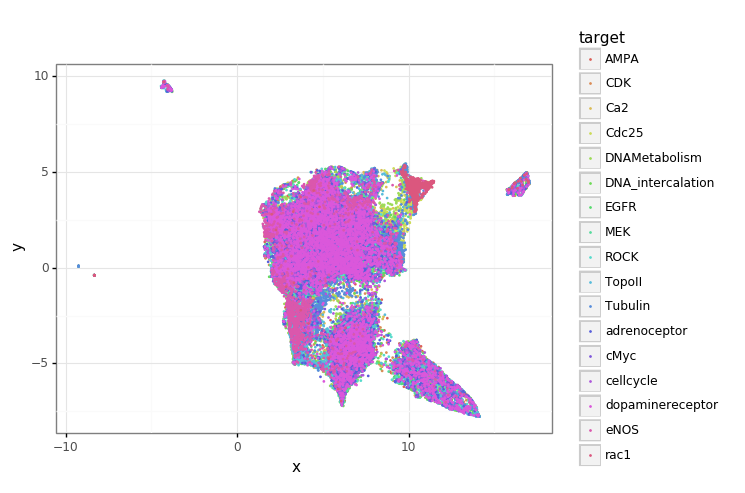

<ggplot: (-9223372036535046719)>

In [46]:
file = os.path.join("data", "training_zscore.csv")
zscore_embedding_df, zscore_plot = get_umap_viz(file)
zscore_plot

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/log_center_umap.png
  warn('Filename: {}'.format(filename))


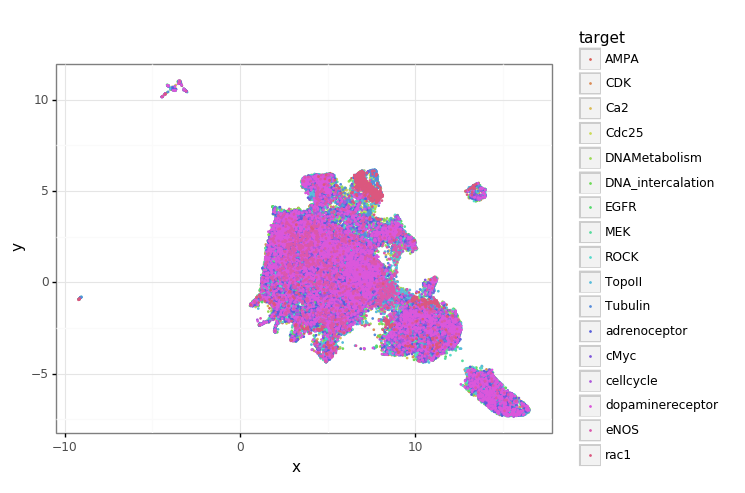

<ggplot: (-9223372036527656416)>

In [22]:
file = os.path.join("figures", "log_center_umap.png")
gg.ggsave(plot=log_center_plot, filename=file, dpi=400)

log_center_plot